<a href="https://colab.research.google.com/github/Obreintelly/Week_4_IP_Autolib_Data/blob/main/Moringa_Data_Science_Prep_W4_Independent_Project_2021_03_Obrein_Telly_Autolib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Section 1:** Loading Libraries and Importing Dataset





# 1.1 Loading the requisite libraries

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

Importing our Autolib Dataset onto Colab

In [89]:
#Lets import our dataset and preview our dataset
url ='http://bit.ly/autolib_dataset'

autolib= pd.read_csv(url)


#1.2 Previewing Our Dataset

In [90]:
#Previewing the first 10 rows
autolib.head(10)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,"Station en parking (niv -1), accÃ¨s 37 rue Leb...",paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,NaN,0,station,closed,nonexistent,2018,4,8,18,20
7,17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,NaN,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,NaN,0,station,ok,nonexistent,2018,4,4,22,13
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,NaN,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,NaN,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,NaN,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,NaN,0,station,ok,nonexistent,2018,4,4,15,2


In [91]:
#Previewing the last 10 rows
autolib.tail(10)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
4990,47 boulevard de l'HÃ´pital,0,0,0,0,0,operational,Paris,NaN,paris-hopital-47,STATION,"48.84019, 2.362478",75013,Paris/HÃ´pital/47,operational,NaN,4,station,ok,nonexistent,2018,4,3,21,13
4991,56 avenue du MarÃ©chal de Lattre de Tassigny,5,5,0,0,0,nonexistent,CrÃ©teil,NaN,creteil-marechaldelattredetassigny-56,STATION,"48.79834, 2.455145",94000,CrÃ©teil/MarÃ©chal de Lattre de Tassigny/56,operational,NaN,1,station,ok,nonexistent,2018,4,7,20,43
4992,3 avenue d'Ivry,0,0,0,0,2,operational,Paris,NaN,paris-ivry-3,STATION,"48.82175, 2.36868",75013,Paris/Ivry/3,operational,NaN,6,station,ok,nonexistent,2018,4,9,23,1
4993,6 avenue Charles-de-Gaulle,6,6,0,0,0,nonexistent,Le Plessis-Robinson,NaN,leplessisrobinson-charlesdegaulle-6,STATION,"48.781849, 2.263931",92350,Le Plessis-Robinson/Charles-de-Gaulle/6,operational,NaN,0,station,ok,nonexistent,2018,4,2,4,43
4994,15 rue de Rocroy,0,0,0,0,0,operational,Paris,NaN,paris-rocroy-15,STATION,"48.8801236, 2.3509617",75010,Paris/Rocroy/15,operational,NaN,1,station,ok,nonexistent,2018,4,1,20,49
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27
4999,5 Rue Henry Brisson,4,4,0,0,0,operational,Paris,NaN,paris-henrybrisson-5,STATION,"48.8984293, 2.3347923",75018,Paris/Henry Brisson/5,operational,NaN,0,station,ok,nonexistent,2018,4,8,10,2


1.3 Accessing Information About Our Dataset

In [92]:
#Lets explore our data set
#Ensuring all the columns have been assigned the correct datatypes 
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [93]:
#viewing the columns of this dataframe to get familiar with the dataset before working on it
autolib.columns.values.tolist()



['Address',
 'Cars',
 'Bluecar counter',
 'Utilib counter',
 'Utilib 1.4 counter',
 'Charge Slots',
 'Charging Status',
 'City',
 'Displayed comment',
 'ID',
 'Kind',
 'Geo point',
 'Postal code',
 'Public name',
 'Rental status',
 'Scheduled at',
 'Slots',
 'Station type',
 'Status',
 'Subscription status',
 'year',
 'month',
 'day',
 'hour',
 'minute']

**Section2: Cleaning Our Dataset**

2.1 For Consistency, a bit of feature reworks are needed. The columns for instance will need to be standardized.

In [94]:
#Lets change all columns to upper case, remove any trailing spaces
#The str.strip function is useful in such operations

autolib.columns = autolib.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.', '_')
autolib.columns

Index(['ADDRESS', 'CARS', 'BLUECAR_COUNTER', 'UTILIB_COUNTER',
       'UTILIB_1_4_COUNTER', 'CHARGE_SLOTS', 'CHARGING_STATUS', 'CITY',
       'DISPLAYED_COMMENT', 'ID', 'KIND', 'GEO_POINT', 'POSTAL_CODE',
       'PUBLIC_NAME', 'RENTAL_STATUS', 'SCHEDULED_AT', 'SLOTS', 'STATION_TYPE',
       'STATUS', 'SUBSCRIPTION_STATUS', 'YEAR', 'MONTH', 'DAY', 'HOUR',
       'MINUTE'],
      dtype='object')

In [95]:
autolib.head()

,ADDRESS,CARS,BLUECAR_COUNTER,UTILIB_COUNTER,UTILIB_1_4_COUNTER,CHARGE_SLOTS,CHARGING_STATUS,CITY,DISPLAYED_COMMENT,ID,KIND,GEO_POINT,POSTAL_CODE,PUBLIC_NAME,RENTAL_STATUS,SCHEDULED_AT,SLOTS,STATION_TYPE,STATUS,SUBSCRIPTION_STATUS,YEAR,MONTH,DAY,HOUR,MINUTE
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


**2.2 Data Selection**

Research Question: Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018




**2.2.1 Validity**

In [96]:
#Before commencing any data analysis we have to prepare and select the most relevant data for our study. 
#This involves ensuring the columns we maintain in our dataset are useful in the question begin investigated. 
#Equally, the rows should be relevant to the study. 
#Lets explore our individual columns to see what values they contain

In [97]:
autolib["DISPLAYED_COMMENT"].unique()

array([nan, 'Station en parking (niv -1), accÃ¨s 37 rue Leblanc',
       'Station en parking (niv 0), accÃ¨s 26 villa Croix Nivert',
       'Station en parking (niv -2), accÃ¨s 4 av. Foch',
       "Borne d'abonnement en sous-sol (niv -1), accÃ¨s 4 rue Lobau",
       'Station en parking (niv -1), accÃ¨s rue Wilson',
       'Station en parking (niv -1), accÃ¨s Place Georges Pompidou',
       'Station en parking (niv -3), accÃ¨s 32 rue dâ\x80\x99Alsace',
       'Station en parking (niv -2), accÃ¨s 2 avenue Gabriel',
       'Station en parking (niv -1), accÃ¨s av. de Versailles',
       'Station en parking (niv -1), accÃ¨s rue Abel Gance',
       'Station en parking (niv -1), accÃ¨s 4 av. des Ternes',
       'Station en parking (niv -1), Station B (sur la droite)',
       'Station en parking',
       'Station en parking (niv -2), accÃ¨s 125 bvd du Montparnasse',
       'Station en parking (niv -1), Station A (sur la gauche)',
       'Station en parking (niv -1), accÃ¨s 8 rue Louise Michel'

In [98]:
autolib["KIND"].unique()
#We do not need this column for purposes of addressing the research question.

array(['STATION', 'PARKING', 'SPACE', 'CENTER'], dtype=object)

In [13]:
autolib["RENTAL_STATUS"].unique()
#For purpose of investigating the research question, we will only concern ourselves with stations that have an 'operational' rental_status
#Broken, future and non-existent stations will need to be deleted from the dataset

array(['operational', 'broken', 'future', 'nonexistent'], dtype=object)

In [99]:
autolib['SCHEDULED_AT'].unique()
#Relates to the planned opening of stations with a future status. We do not need this in our analysis.

array([nan, '2016-07-27T15:32:21', '2016-07-05T13:10:09',
       '2015-09-29T13:58:29', '2016-04-26T14:28:01',
       '2012-09-17T08:57:28', '2016-01-06T10:35:38',
       '2018-01-03T10:52:00', '2016-07-27T15:32:22'], dtype=object)

In [15]:
autolib['STATION_TYPE'].unique()

array(['station', 'full_station', 'subs_center'], dtype=object)

In [16]:
autolib['SLOTS'].unique()

#We do not to know the number of parking slots available for purposes of this study

array([2, 0, 1, 3, 4, 6, 5, 7])

In [100]:
autolib['PUBLIC_NAME'].unique()

array(['Paris/Suffren/2', 'Paris/Raymond Losserand/145',
       'Le Bourget/John Fitzgerald Kennedy/2', ...,
       'Paris/VercingÃ©torix/106', 'Nanterre/National/134',
       'Paris/SÃ©rurier/54'], dtype=object)

In [18]:
autolib['SUBSCRIPTION_STATUS'].unique()
#We certainly do not need to know the subscription status of a station for this study

array(['nonexistent', 'operational', 'broken'], dtype=object)

Dropping Irrelevant Rows and Columns

In [101]:
#From the above exploration of our dataset, it is evident we will need to only concern ourselves with operational stations. 
#As such we shall delete any other station that is not operational
#We do that using Conditions and Rowindex

#autolib[autolib.RENTAL_STATUS != "operational"].index

#Drop rows that don't meet this condition and let's call it autolib_new
autolib_new = autolib.drop(autolib[(autolib.RENTAL_STATUS != "operational")].index)





In [102]:
#Dropping irrelevant columns from autolib_new
autolib_new.drop(["DISPLAYED_COMMENT", "ID", "KIND", "GEO_POINT","SLOTS","CHARGE_SLOTS","SCHEDULED_AT","STATION_TYPE","CHARGING_STATUS","STATUS","SUBSCRIPTION_STATUS"], axis=1, inplace= True)


In [103]:
#DIsplay the new Dataset
autolib_new.head()

,ADDRESS,CARS,BLUECAR_COUNTER,UTILIB_COUNTER,UTILIB_1_4_COUNTER,CITY,POSTAL_CODE,PUBLIC_NAME,RENTAL_STATUS,YEAR,MONTH,DAY,HOUR,MINUTE
0,2 Avenue de Suffren,0,0,0,0,Paris,75015,Paris/Suffren/2,operational,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,Paris,75014,Paris/Raymond Losserand/145,operational,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,Le Bourget,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,Paris,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,Paris,75017,Paris/Porte de Champerret/6,operational,2018,4,8,17,23


In [104]:
autolib_new.shape

(4618, 14)

In [105]:
autolib_new.melt(id_vars=["PUBLIC_NAME","ADDRESS",	"CARS",	"BLUECAR_COUNTER",	"UTILIB_COUNTER",	"UTILIB_1_4_COUNTER",		"CITY",	"POSTAL_CODE",	"RENTAL_STATUS",	"YEAR",	"MONTH",	"DAY",	"HOUR",	"MINUTE"])

,PUBLIC_NAME,ADDRESS,CARS,BLUECAR_COUNTER,UTILIB_COUNTER,UTILIB_1_4_COUNTER,CITY,POSTAL_CODE,RENTAL_STATUS,YEAR,MONTH,DAY,HOUR,MINUTE,variable,value


Removing Non-Alphanumeric characters in the dataset

In [ ]:
#The non-alphanumeric values are in the Address,Public Name and City Columns

In [106]:
#Removing the non-alpha-numeric © from the dataset
#autolib_new['CITY'].where(~(autolib_new.CITY == '©'), other= '', inplace=True)
#autolib_new['ADDRESS'].where(~(autolib_new.ADDRESS == '©'), other= '', inplace=True)

autolib_new = autolib_new.replace({'©':""}, regex=True)

In [107]:
autolib_new.head(4)

,ADDRESS,CARS,BLUECAR_COUNTER,UTILIB_COUNTER,UTILIB_1_4_COUNTER,CITY,POSTAL_CODE,PUBLIC_NAME,RENTAL_STATUS,YEAR,MONTH,DAY,HOUR,MINUTE
0,2 Avenue de Suffren,0,0,0,0,Paris,75015,Paris/Suffren/2,operational,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,Paris,75014,Paris/Raymond Losserand/145,operational,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,Le Bourget,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ,3,3,1,0,Paris,75013,Paris/EugÃ¨ne OudinÃ/51,operational,2018,4,4,4,37


**2.2.2 Accuracy**

Confirming the entries in the column Cars, Bluecar counter, Utilib Counter, Utilib 1.4 Counter to ensure they are what we expect

In [30]:
#From the Dalber Dataset Description, we know the following:
#Cars [0-7]
#Bluecar counter [0-7]
#Utilib Counter [0-4]
#Utilib 1.4 Counter [0-5]

#We therefore check that this is the case in our columns

#Checking the Cars column
autolib_new['CARS'].unique()

array([0, 6, 3, 1, 5, 4, 2, 7])

In [31]:
#Checking the Bluecar Counter
autolib_new['BLUECAR_COUNTER'].unique()


array([0, 6, 3, 1, 5, 4, 2, 7])

In [32]:
#Checking the Utilib Counter
autolib_new['UTILIB_COUNTER'].unique()

array([0, 1, 2])

In [33]:
#checking the Utilib 1.4 Counter
autolib_new['UTILIB_1_4_COUNTER'].unique()

array([0, 2, 1, 3])

Confirming that we are working with the correct Time Period

In [34]:
#We know that the data wwas collected for 9 days in 2018
#Therefore the accurate year should be 2018
#Checking this is the case

autolib_new['YEAR'].unique()

array([2018])

In [35]:
#Confirming we have the month of April in the column Month 
autolib_new['MONTH'].unique()

array([4])

In [36]:
#Confirming we have the right day. We know the data was collected from the 1st of April to the 8th of April
autolib_new['DAY'].unique()

array([8, 6, 3, 4, 2, 1, 5, 9, 7])

In [37]:
#Confirming we have the correct hour values
autolib_new['HOUR'].unique()

array([11,  7, 20,  4, 17, 22, 15,  9, 12, 21,  8,  0, 19,  6,  3, 23,  1,
       10, 16, 13, 18,  2, 14,  5])

In [38]:
#Confirming we have the correct Minute values
autolib_new['MINUTE'].unique()

array([43, 24, 14, 37, 23,  2, 13, 58, 39, 20, 22, 54,  0, 21, 31, 16, 32,
        6, 11, 27, 40, 53, 28,  7,  9, 51, 48, 36, 17,  3, 38, 25,  5, 35,
       52, 49, 44, 56, 55, 29, 59, 10, 41, 42, 50,  8, 19, 57, 34, 46,  4,
       18, 26, 47, 45, 33,  1, 30, 12, 15])

**2.2.3 Completeness**

In [108]:
#Ensuring that there are no missing values in our data
autolib_new.isna().any().any()

False

In [40]:
autolib_new.isnull().values.any()

False

**2.2.4 Consistency**

In [109]:
autolib_new.duplicated(keep=False)

#There are no duplicates in our data

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 4618, dtype: bool

In [42]:
#We re-confirm by counting number of duplicates
autolib_new.duplicated().sum()

0

**2.2.5 Uniformity**

In [43]:
#Additional feature engineering operations need to be conducted on our columns.
#For instance, to get an accurate and clear account of Date & Time, 
#we need to join the year, month, Day, Hour and Minute columns
#We do this by first creating a DATE column 

In [110]:
autolib_new["DATE"]= pd.to_datetime(autolib_new[["YEAR","MONTH","DAY","HOUR","MINUTE"]])
autolib_new

,ADDRESS,CARS,BLUECAR_COUNTER,UTILIB_COUNTER,UTILIB_1_4_COUNTER,CITY,POSTAL_CODE,PUBLIC_NAME,RENTAL_STATUS,YEAR,MONTH,DAY,HOUR,MINUTE,DATE
0,2 Avenue de Suffren,0,0,0,0,Paris,75015,Paris/Suffren/2,operational,2018,4,8,11,43,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,6,0,0,Paris,75014,Paris/Raymond Losserand/145,operational,2018,4,6,7,24,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,Le Bourget,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,2018,4,3,20,14,2018-04-03 20:14:00
3,51 Rue EugÃ¨ne OudinÃ,3,3,1,0,Paris,75013,Paris/EugÃ¨ne OudinÃ/51,operational,2018,4,4,4,37,2018-04-04 04:37:00
4,6 avenue de la Porte de Champerret,3,3,0,0,Paris,75017,Paris/Porte de Champerret/6,operational,2018,4,8,17,23,2018-04-08 17:23:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃnelotte,2,2,0,0,Colombes,92700,Colombes/MÃnelotte/8,operational,2018,4,6,11,26,2018-04-06 11:26:00
4996,37 rue de Dantzig,4,4,0,0,Paris,75015,Paris/Dantzig/37,operational,2018,4,4,16,56,2018-04-04 16:56:00
4997,142 rue du Bac,1,1,0,0,Paris,75007,Paris/Bac/142,operational,2018,4,1,7,1,2018-04-01 07:01:00
4998,2 avenue du Val de Fontenay,2,2,0,0,Fontenay-Sous-Bois,94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,2018,4,4,17,27,2018-04-04 17:27:00


In [45]:
#Since we have a single DATE column with DATE & TIME
#We can drop the YEAR, MONTH and MINUTE columns as they are now superflous 
#We keep the Day and Hour Columns because we will need them in our study

In [111]:
autolib_new.drop(["YEAR","MONTH","MINUTE"], axis=1, inplace=True)

In [115]:
#Our new column:
autolib_new.head(3)

,ADDRESS,CARS,BLUECAR_COUNTER,UTILIB_COUNTER,UTILIB_1_4_COUNTER,CITY,POSTAL_CODE,PUBLIC_NAME,RENTAL_STATUS,DAY,HOUR,DATE
0,2 Avenue de Suffren,0,0,0,0,Paris,75015,Paris/Suffren/2,operational,8,11,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,6,0,0,Paris,75014,Paris/Raymond Losserand/145,operational,6,7,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,Le Bourget,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,3,20,2018-04-03 20:14:00


Detecting if there are any outliers in our data

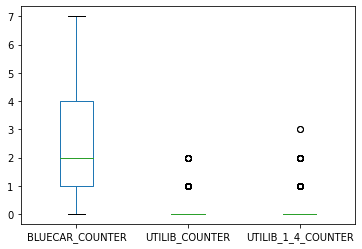

In [113]:
#We already know from carrying out unique() tests in 
#our car columns that our data is within range and as expected. 
#There are no significant outliers. Low demand/use may spring up some outliers but 
#given the size of the dataset we have to keep them.
#We expect reasonable outliers from our data
#Anyhow just to confirm visually that this is the case we use a box plot
% matplotlib inline 

autolib_new.boxplot(column =['BLUECAR_COUNTER', 'UTILIB_COUNTER', 'UTILIB_1_4_COUNTER'], grid = False)
#bplot = sns.boxplot(y='lifeExp', x='continent', data=gapminder_2007, width=0.5, palette="colorblind")

Our boxplot avove confirms that theer are no outliers in our data. 

***Having done all the requisite Data Cleaning Operations, our data should be both valid and ready for analysis***

**3.0 Analysis**


To compute usage, we will need to understand that we have to join successive (in time) measures/counters for a given station, as the difference will tell whether a car was picked up, returned, or nothing happened.

3.1. Computing USage

In [116]:
#Since the ADDRESS where cars are picked and returned are unique, we will need to to ensure we sort our data with address and time

autolib_new.sort_values(by=["ADDRESS", "DATE"])
autolib_new.head()

,ADDRESS,CARS,BLUECAR_COUNTER,UTILIB_COUNTER,UTILIB_1_4_COUNTER,CITY,POSTAL_CODE,PUBLIC_NAME,RENTAL_STATUS,DAY,HOUR,DATE
0,2 Avenue de Suffren,0,0,0,0,Paris,75015,Paris/Suffren/2,operational,8,11,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,6,0,0,Paris,75014,Paris/Raymond Losserand/145,operational,6,7,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,Le Bourget,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,3,20,2018-04-03 20:14:00
3,51 Rue EugÃ¨ne OudinÃ,3,3,1,0,Paris,75013,Paris/EugÃ¨ne OudinÃ/51,operational,4,4,2018-04-04 04:37:00
4,6 avenue de la Porte de Champerret,3,3,0,0,Paris,75017,Paris/Porte de Champerret/6,operational,8,17,2018-04-08 17:23:00


In [53]:
autolib_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4618 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ADDRESS             4618 non-null   object        
 1   CARS                4618 non-null   int64         
 2   BLUECAR_COUNTER     4618 non-null   int64         
 3   UTILIB_COUNTER      4618 non-null   int64         
 4   UTILIB_1_4_COUNTER  4618 non-null   int64         
 5   CITY                4618 non-null   object        
 6   POSTAL_CODE         4618 non-null   int64         
 7   PUBLIC_NAME         4618 non-null   object        
 8   RENTAL_STATUS       4618 non-null   object        
 9   DAY                 4618 non-null   int64         
 10  HOUR                4618 non-null   int64         
 11  DATE                4618 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(7), object(4)
memory usage: 469.0+ KB


**3.1 Preliminary Analysis**

In [117]:
#Number of Stations identifiable by the ADDRESSES
len(list(autolib_new['ADDRESS'].unique()))

1025

In [56]:
len(list(autolib_new['POSTAL_CODE'].unique()))

103

In [118]:
#Number of Days
len(list(autolib_new['DAY'].unique()))

9

In [120]:
#Summary Static of CARS
autolib_new['CARS'] = autolib_new['CARS'].astype('category')


In [121]:
autolib_new['CARS'].describe()

count     4618
unique       8
top          0
freq      1065
Name: CARS, dtype: int64

In [122]:
autolib_new['CARS'] = autolib_new['CARS'].astype(int)

**Computation**

To answer this question we will need to compute the cummulative difference or lags in picking up a shared electric car. To do this we will use ***diff() *** and check our results with  **shift()** which is a very powerful Ufunc.
When a car is picked the lag moves closer and even below zero.

When a previously picked car is returned the lag moves closer and above zero.


In [123]:
lags= autolib_new
lags.head(1)

,ADDRESS,CARS,BLUECAR_COUNTER,UTILIB_COUNTER,UTILIB_1_4_COUNTER,CITY,POSTAL_CODE,PUBLIC_NAME,RENTAL_STATUS,DAY,HOUR,DATE
0,2 Avenue de Suffren,0,0,0,0,Paris,75015,Paris/Suffren/2,operational,8,11,2018-04-08 11:43:00


In [62]:
#We use the diff function to find the difference between the Number of Cars in a row
# and the number of cars in the preceding row. This difference will tell us whether 
#there was an activity i.e., a car was picked or returned. THe first row in our data
#has no row above it to get the difference. We therefore except to get a NAN. We get rid of all
#the Nans by filling them with 0.
#lags['CARS_LAG'] = lags.groupby(['ADDRESS'])['CARS'].diff().fillna(0)

In [ ]:
#lags.info()

In [64]:
#Lets convert the CAR_LAG from a float to an int
#lags.CARS_LAG = lags.CARS_LAG.astype(int)

In [69]:
#We carry out the same steps in the BLUECAR column
#lags['BLUE_LAGS'] = lags.groupby(['PUBLIC_NAME'])['BLUECAR_COUNTER'].diff().fillna(0)
#Convert the new column from float to int
#lags.BLUE_LAGS = lags.BLUE_LAGS.astype(int)

In [85]:
#To compute the most popular hour in the city of PAris, we first subset Paris entries. For every car picked, the remaining
#number in a station goes down. As such, when calculating the difference between rows, we will be working with negatives.Thus,
#a pick corresponds to a number less than 0.
#most_picks = lags[(lags.CITY == 'Paris') & (lags.BLUE_LAGS < 0)].groupby('HOUR')['BLUE_LAGS'].sum().reset_index()

#We pick the most minimal sum of BLUE_LAGS
#most_pop_hour= most_picks[most_picks['BLUE_LAGS']==most_picks['BLUE_LAGS'].min()]
#most_pop_hour

In [86]:
#What is the most popular hour for returning cars
#We follow the same steps but change the condition to greater than zero
#most_picks = lags[(lags.CITY == 'Paris') & (lags.BLUE_LAGS > 0)].groupby('HOUR')['BLUE_LAGS'].sum().reset_index()

#
#most_pop_hour= most_picks[most_picks['BLUE_LAGS']==most_picks['BLUE_LAGS'].max()]
#most_pop_hour

In [ ]:
# Just the columns I want to work with. 
#filtered_paris_only = paris_only.copy()
#filtered_paris_only.drop(['UTILIB_COUNTER', 'UTILIB_1_4_COUNTER', 'POSTAL_CODE', 'POSTAL_CODE', 'DAY'], axis=1, inplace=True)
#group_hour_paris = filtered_paris_only.groupby('HOUR').sum()

# Get the Lag
#group_hour_paris['BLUECAR_LAGS'] = group_hour_paris['BLUECAR_COUNTER'].sub(group_hour_paris['BLUECAR_COUNTER'].shift())
#group_hour_paris

#group_hour_paris['BLUECAR_COUNTER'].argmax()

Filtering out the Data for the City of Paris 

In [124]:
#First, lets select the City under study.
#Subsetting the City of Paris
paris_only = lags[lags["CITY"]== "Paris"]
paris_only.head()

,ADDRESS,CARS,BLUECAR_COUNTER,UTILIB_COUNTER,UTILIB_1_4_COUNTER,CITY,POSTAL_CODE,PUBLIC_NAME,RENTAL_STATUS,DAY,HOUR,DATE
0,2 Avenue de Suffren,0,0,0,0,Paris,75015,Paris/Suffren/2,operational,8,11,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,6,0,0,Paris,75014,Paris/Raymond Losserand/145,operational,6,7,2018-04-06 07:24:00
3,51 Rue EugÃ¨ne OudinÃ,3,3,1,0,Paris,75013,Paris/EugÃ¨ne OudinÃ/51,operational,4,4,2018-04-04 04:37:00
4,6 avenue de la Porte de Champerret,3,3,0,0,Paris,75017,Paris/Porte de Champerret/6,operational,8,17,2018-04-08 17:23:00
5,8 Boulevard Voltaire,0,0,0,0,Paris,75011,Paris/Voltaire/8,operational,6,7,2018-04-06 07:02:00


**4.0 Questions**

1. What is the most popular hour for picking up  a shared electric car (Bluecar) in the city of Paris over the month of April 2018

In [126]:
paris_only['BLUECAR_LAGS'] = paris_only['BLUECAR_COUNTER'].sub(paris_only['BLUECAR_COUNTER'].shift())
paris_only['BLUECAR_LAGS'].iloc[0] = paris_only['BLUECAR_COUNTER'].iloc[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [127]:
pop_hour_paris = paris_only[paris_only['BLUECAR_LAGS']<0].groupby('HOUR')['BLUECAR_LAGS'].count().sort_values(ascending = False)
pop_hour_paris

HOUR
21    63
4     52
20    52
7     52
16    51
6     49
13    48
17    48
18    48
5     47
2     46
8     46
14    44
15    43
3     43
19    42
1     39
22    38
9     38
23    37
11    34
10    34
12    34
0     32
Name: BLUECAR_LAGS, dtype: int64

In [128]:
pop_hour_paris= paris_only['BLUECAR_LAGS']<0
paris_only[pop_hour_paris].HOUR.mode(())

0    21
dtype: int64

In [129]:
paris_only.head(22)

,ADDRESS,CARS,BLUECAR_COUNTER,UTILIB_COUNTER,UTILIB_1_4_COUNTER,CITY,POSTAL_CODE,PUBLIC_NAME,RENTAL_STATUS,DAY,HOUR,DATE,BLUECAR_LAGS
0,2 Avenue de Suffren,0,0,0,0,Paris,75015,Paris/Suffren/2,operational,8,11,2018-04-08 11:43:00,0.0
1,145 Rue Raymond Losserand,6,6,0,0,Paris,75014,Paris/Raymond Losserand/145,operational,6,7,2018-04-06 07:24:00,6.0
3,51 Rue EugÃ¨ne OudinÃ,3,3,1,0,Paris,75013,Paris/EugÃ¨ne OudinÃ/51,operational,4,4,2018-04-04 04:37:00,-3.0
4,6 avenue de la Porte de Champerret,3,3,0,0,Paris,75017,Paris/Porte de Champerret/6,operational,8,17,2018-04-08 17:23:00,0.0
5,8 Boulevard Voltaire,0,0,0,0,Paris,75011,Paris/Voltaire/8,operational,6,7,2018-04-06 07:02:00,-3.0
8,34 avenue Jean Moulin,1,1,0,0,Paris,75014,Paris/Jean Moulin/34,operational,2,22,2018-04-02 22:58:00,1.0
9,41 boulevard de Rochechouart,6,6,0,0,Paris,75009,Paris/Anvers/Parking,operational,4,15,2018-04-04 15:02:00,5.0
10,14 rue Censier,0,0,0,0,Paris,75005,Paris/Censier/14,operational,1,4,2018-04-01 04:39:00,-6.0
12,6 avenue de la Porte de Champerret,5,5,1,0,Paris,75017,Paris/Porte de Champerret/6,operational,5,12,2018-04-05 12:22:00,5.0
13,34 avenue Jean Moulin,0,0,0,0,Paris,75014,Paris/Jean Moulin/34,operational,8,21,2018-04-08 21:54:00,-5.0


2. What is the most popular hour for returning cars?

In [130]:
paris_only['BLUECAR_LAGS'] = paris_only['BLUECAR_COUNTER'].sub(paris_only['BLUECAR_COUNTER'].shift())
paris_only['BLUECAR_LAGS'].iloc[0] = paris_only['BLUECAR_COUNTER'].iloc[0]

pop_hour_paris = paris_only[paris_only['BLUECAR_LAGS'] >0 ].groupby('HOUR')['HOUR'].count().sort_values(ascending = False)
pop_hour_paris

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

HOUR
10    56
21    55
12    55
6     53
3     52
8     52
9     52
18    48
0     47
5     47
19    46
13    45
11    44
16    44
22    43
7     43
2     43
23    40
15    39
1     39
17    37
14    35
4     32
20    32
Name: HOUR, dtype: int64

In [149]:
pop_hour_paris= paris_only['BLUECAR_LAGS']>0
paris_only[pop_hour_paris].HOUR.mode(())

0    10
dtype: int64

3. What station is the most popular?
Overall?
At the most popular picking hour?

In [156]:
#Most Popular Station. Groupingby Address
ppo_station = paris_only.groupby("PUBLIC_NAME")['BLUECAR_COUNTER'].sum().sort_values(ascending=False)
pop_station.head(1)


ADDRESS
19 rue Tronchet    4
Name: PUBLIC_NAME, dtype: int64

In [140]:
#Most Popular Hour
pop_hour = paris_only[paris_only['BLUECAR_LAGS']<0].groupby("HOUR")['HOUR'].sum().sort_values(ascending=False)
pop_hour.head(1)

HOUR
21    1323
Name: HOUR, dtype: int64

In [151]:
#Station and Most Popular Picking Hour

#autolib_new_set[autolib_new_set['HOURS']==21]
pop_station = paris_only[paris_only['HOUR']==21].groupby("ADDRESS")["PUBLIC_NAME"].count().sort_values(ascending= False)
pop_station.head(1)

ADDRESS
19 rue Tronchet    4
Name: PUBLIC_NAME, dtype: int64

4. Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars?

In [ ]:
#We carry out the same steps as we have done above

In [142]:
paris_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2629 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ADDRESS             2629 non-null   object        
 1   CARS                2629 non-null   int64         
 2   BLUECAR_COUNTER     2629 non-null   int64         
 3   UTILIB_COUNTER      2629 non-null   int64         
 4   UTILIB_1_4_COUNTER  2629 non-null   int64         
 5   CITY                2629 non-null   object        
 6   POSTAL_CODE         2629 non-null   int64         
 7   PUBLIC_NAME         2629 non-null   object        
 8   RENTAL_STATUS       2629 non-null   object        
 9   DAY                 2629 non-null   int64         
 10  HOUR                2629 non-null   int64         
 11  DATE                2629 non-null   datetime64[ns]
 12  BLUECAR_LAGS        2629 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(7), obje

1. Popular Hour for Picking Utilib

In [143]:
paris_only['UTILIB_LAGS'] = paris_only['UTILIB_COUNTER'].sub(paris_only['UTILIB_COUNTER'].shift())
paris_only['UTILIB_LAGS'].iloc[0] = paris_only['UTILIB_COUNTER'].iloc[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [146]:
utilibpop_hour_paris = paris_only[paris_only['UTILIB_LAGS'] <0 ].groupby('HOUR')['HOUR'].count().sort_values(ascending = False)
utilibpop_hour_paris.head(1)

HOUR
9    10
Name: HOUR, dtype: int64

2. Pop hour for Returning Utilib

In [147]:
utilibpop_hour_paris = paris_only[paris_only['UTILIB_LAGS'] >0 ].groupby('HOUR')['HOUR'].count().sort_values(ascending = False)
utilibpop_hour_paris.head(1)

HOUR
6    12
Name: HOUR, dtype: int64

3. Most Popular Station

In [155]:
#Most Popular Station. Groupingby PUBLIC NAME
pop_station_utilib = paris_only.groupby("PUBLIC_NAME")['UTILIB_COUNTER'].sum().sort_values(ascending=False)
pop_station_utilib.head(1)

PUBLIC_NAME
Paris/Mac Mahon/5    4
Name: UTILIB_COUNTER, dtype: int64

4. Station & Most Popular Picking Hour

In [157]:
#Station and Most Popular Picking Hour

pop_station_utilib_hour = paris_only[paris_only['HOUR']==9].groupby("ADDRESS")["PUBLIC_NAME"].count().sort_values(ascending= False)
pop_station_utilib_hour.head(1)

ADDRESS
70 avenue Henri Martin    2
Name: PUBLIC_NAME, dtype: int64

1. Popular Hour for picking UTILIB_1_4

In [158]:
paris_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2629 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ADDRESS             2629 non-null   object        
 1   CARS                2629 non-null   int64         
 2   BLUECAR_COUNTER     2629 non-null   int64         
 3   UTILIB_COUNTER      2629 non-null   int64         
 4   UTILIB_1_4_COUNTER  2629 non-null   int64         
 5   CITY                2629 non-null   object        
 6   POSTAL_CODE         2629 non-null   int64         
 7   PUBLIC_NAME         2629 non-null   object        
 8   RENTAL_STATUS       2629 non-null   object        
 9   DAY                 2629 non-null   int64         
 10  HOUR                2629 non-null   int64         
 11  DATE                2629 non-null   datetime64[ns]
 12  BLUECAR_LAGS        2629 non-null   float64       
 13  UTILIB_LAGS         2629 non-null   float64     

In [159]:
paris_only['UTILIB14_LAGS'] = paris_only['UTILIB_1_4_COUNTER'].sub(paris_only['UTILIB_1_4_COUNTER'].shift())
paris_only['UTILIB14_LAGS'].iloc[0] = paris_only['UTILIB_1_4_COUNTER'].iloc[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [160]:
utilibFTNpop_hour_paris = paris_only[paris_only['UTILIB14_LAGS'] <0 ].groupby('HOUR')['HOUR'].count().sort_values(ascending = False)
utilibFTNpop_hour_paris.head(1)

HOUR
8    15
Name: HOUR, dtype: int64

2.Pop hour for Returning Utilib14

In [161]:
utilibFTNpop_hour_paris = paris_only[paris_only['UTILIB14_LAGS'] >0 ].groupby('HOUR')['HOUR'].count().sort_values(ascending = False)
utilibFTNpop_hour_paris.head(1)

HOUR
9    17
Name: HOUR, dtype: int64

3. Most Popular Station for picking Utilib

In [162]:
pop_station_utilibFTN = paris_only.groupby("PUBLIC_NAME")['UTILIB_1_4_COUNTER'].sum().sort_values(ascending=False)
pop_station_utilibFTN.head(1)

PUBLIC_NAME
Paris/Porte de Montrouge/8    7
Name: UTILIB_1_4_COUNTER, dtype: int64

4. Station and Most Popular Picking Hours

In [163]:
#Station and Most Popular Picking Hour

pop_station_utilibFTN_hour = paris_only[paris_only['HOUR']==8].groupby("ADDRESS")["PUBLIC_NAME"].count().sort_values(ascending= False)
pop_station_utilibFTN_hour.head(1)

ADDRESS
28 Avenue de la Porte de Villiers    3
Name: PUBLIC_NAME, dtype: int64

Comparing the results of UTILIB and UTILIB 14 to the BLUECAR results, we draw the following conclusions:
1. The most popular hours for pickups are not the same
2. The most popular hours for returns are different 
3. THe most popular stations are not the same 